#Sentiment Analysis Pada Aplikasi Bank
<p> Sentiment analysis dilakukan pada tiga aplikasi bank, yaitu
<ol>
  <li>Aplikasi Bank BCA</li>
  <li>Aplikasi Bank BRI</li>
  <li>Aplikasi Bank BNI</li>
</ol>

</P>


##Tujuan
<p>Tujuan dari dilakukan sentiment analysis pada aplikasi adalah untuk mengetahui opini masyarakat mengenai aplikasi Bank yang digunakan seperti fitur yang ada pada aplikasi. Dengan dilakukan sentiment analisis juga dapat membantu developer mengetahui apakah aplikasi yang ada sudah baik atau perlu dilakukan peningkatan pada beberapa aspek.</p>

## Metode
<p>Project ini menggunakan library sastrawi untuk membantu proses prepocessing dan modeling. Secara garis besar proses sentiment pada project ini terdiri dari tiga tahapan utama, yaitu</p>
  <ul>
    <li>Prepocessing</li>
    <li>Algoritma Klasifikasi</li>
        Algoritma klasifikasi digunakan untuk mengklasifikasikan suatu kalimat memiliki sentiment positif, netral, atau negatif. Bebrapa algoritma klasifikasi yang digunakan adalah
        <ol>
        <li>Algoritma Naive Bayes</li>
         <li>Algoritma Support Vector Machine (SVM)</li>
         <li>Algoritma XgBoost</li>
         <li>Algoritma Random Forest
        <ol>
  </ul>


In [18]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
#load data
df = pd.read_csv('/content/drive/MyDrive/dataPerbankan.csv')
df.head(10)

,at,userName,content,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,di update malah ngabisin pulsa buat verifikasi...,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,udah scan dokumen sama scan wajah berulang kal...,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,adminnya jawaban selalu monoton mohon mengirim...,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,aplikasi ini menjadi gak guna masa mengenali w...,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,di update malah nyusahinlogin beberapa kali te...,1,BCA
5,2022-12-30 16:32:06,Pipit Mpyt,dari dulu saya sangat suka apk mbanking ini ko...,1,BCA
6,2022-12-30 15:49:33,Cah Banten,verifikasi muka yg gagal terus sangat mempersu...,1,BCA
7,2022-12-30 12:37:45,Samz Arif,sy ganti hp pas mau masuk lg skrg ada verifika...,1,BCA
8,2022-12-30 11:58:28,Damay Shoppu,qrist terima dana sekarang hilang padahal sang...,4,BCA
9,2022-12-29 23:51:22,Mochamad Romadhon,teknologi scan isi data ktp otomatis sudah ses...,1,BCA


In [20]:
df.columns

Index(['at', 'userName', 'content', 'score', 'application'], dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   at           6170 non-null   object
 1   userName     6170 non-null   object
 2   content      6168 non-null   object
 3   score        6170 non-null   int64 
 4   application  6170 non-null   object
dtypes: int64(1), object(4)
memory usage: 241.1+ KB


<h2> Data Prepocessing </h2>

In [22]:
def filtered_token_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x : len(x.split()))
  mask = ( words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df


In [23]:
min_words = 3
max_words = 60
df = filtered_token_by_length(df, 'content', min_words, max_words)
df.head()

,at,userName,content,score,application
0,2022-12-31 15:33:31,Miftah Assundawi,di update malah ngabisin pulsa buat verifikasi...,1,BCA
1,2022-12-31 09:31:31,muhamad maulana ahsan,udah scan dokumen sama scan wajah berulang kal...,1,BCA
2,2022-12-31 06:42:45,Lanjutkan Di Kita Official,adminnya jawaban selalu monoton mohon mengirim...,1,BCA
3,2022-12-31 05:59:59,Beizi Nakata,aplikasi ini menjadi gak guna masa mengenali w...,1,BCA
4,2022-12-31 03:45:08,Akhmad Supriyanto,di update malah nyusahinlogin beberapa kali te...,1,BCA


In [24]:
# normalization
norm = {'kmna':'mana','bisa2':'bisa','ngga':'tidak','apk':'aplikasi', 'tdk':'tidak','gk':'tidak','skrg':'sekarang','uwang':'uang', 'gak':'tidak', 'transasi':'transaksi', 'jd':'jadi','tlpn':'telepon',
        'klu':'kalau','sy':'saya','yg':'yang','knp':'kenapa'}
def normalization(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

In [25]:
df['content']=df['content'].apply(lambda x: normalization(x))
df['content']

<ipython-input-25-ef0688cf4199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content']=df['content'].apply(lambda x: normalization(x))


,content
0,di update malah ngabisin pulsa buat verifikasi...
1,udah scan dokumen sama scan wajah berulang kal...
2,adminnya jawaban selalu monoton mohon mengirim...
3,aplikasi ini menjadi tidak guna masa mengenali...
4,di update malah nyusahinlogin beberapa kali te...
...,...
6165,tidak bisa dibukadisentuh jg tidak bisapdahal ...
6166,sangat membantu dan mudah di gunakan dan efesi...
6167,mantapp cepat tepat dan akurat
6168,sangat mudah digunakan untuk transaksi apapun ...


In [26]:
pip install sastrawi

In [27]:
from re import A
# Stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover,StopWordRemoverFactory, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stopword_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stopword_remover_new.remove(str_text)
  return str_text

In [28]:
df['content']=df['content'].apply(lambda x: stopword(x))
df['content']

,content
0,update malah ngabisin pulsa buat verifikasi le...
1,udah scan dokumen sama scan wajah berulang kal...
2,adminnya jawaban selalu monoton mohon mengirim...
3,aplikasi menjadi guna masa mengenali wajah pem...
4,update malah nyusahinlogin beberapa kali tetep...
...,...
6165,bisa dibukadisentuh jg bisapdahal baru buat br...
6166,sangat membantu mudah gunakan efesien waktu
6167,mantapp cepat tepat akurat
6168,sangat mudah digunakan transaksi apapun trims ...


In [29]:
#tokenization
tokenized = df['content'].apply(lambda x: x.split())
tokenized

,content
0,"[update, malah, ngabisin, pulsa, buat, verifik..."
1,"[udah, scan, dokumen, sama, scan, wajah, berul..."
2,"[adminnya, jawaban, selalu, monoton, mohon, me..."
3,"[aplikasi, menjadi, guna, masa, mengenali, waj..."
4,"[update, malah, nyusahinlogin, beberapa, kali,..."
...,...
6165,"[bisa, dibukadisentuh, jg, bisapdahal, baru, b..."
6166,"[sangat, membantu, mudah, gunakan, efesien, wa..."
6167,"[mantapp, cepat, tepat, akurat]"
6168,"[sangat, mudah, digunakan, transaksi, apapun, ..."


In [30]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do=[]
  for word in text_cleaning:
    stem_word = stemmer.stem(word)
    do.append(stem_word)
  d_clean =[]
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

In [31]:
tokenized = tokenized.apply(stemming)
tokenized

Streaming output truncated to the last 5000 lines.
untuk servernya ditintidakatkan mau transaksi selalu indikator merah terus tulis koneksi putus padahal kuota saya masih banyak buat internetan tetap lancar segera benah untuk masalah lose connection
atidak kecewa awal guna aplikasi semua normal aja telah cetak kartu atm bca nya lampu indikator nya merah terus ga mau hijau ga ngecek saldo gimana
baru update malah sering ga transaksi hadeuuuh titidakl klik send indikator nya langsung biru coba kali kali tetap
minta ratting ulang ku kasih 1 bintang pelihara sistem malah susah cek saldo aplikasi bca mobile kesini malah jelek sekali lama banget buat buka transaksi lampu indikator selalu merah ijo nya lama banget salah developer apa emang servernya sedang down
mbanking bca mobile error saya mau cek mutasi transfer bisa di baik dong admin bca kan lumayan gede potong nya tiap bulan malah begini layan nya
hello dong stabil kualitas apps saat ken transfer sama sekali bisa padahal sinyal internet

,content
0,update malah ngabisin pulsa buat verifikasi le...
1,udah scan dokumen sama scan wajah ulang kali t...
2,adminnya jawab selalu monoton mohon kirim scre...
3,aplikasi jadi guna masa nali wajah milik nya b...
4,update malah nyusahinlogin beberapa kali tetep...
...,...
6165,bisa dibukadisentuh jg bisapdahal baru buat br...
6166,sangat bantu mudah guna efesien waktu
6167,mantapp cepat tepat akurat
6168,sangat mudah guna transaksi apa trims brimo


In [109]:
# load data hasil prepocessing
df = pd.read_csv('/content/drive/MyDrive/hasil_preprocessing.csv')
df.head(10)

,content,at,userName,score,application
0,update malah ngabisin pulsa buat verifikasi le...,2022-12-31 15:33:31,Miftah Assundawi,1,BCA
1,udah scan dokumen sama scan wajah ulang kali t...,2022-12-31 09:31:31,muhamad maulana ahsan,1,BCA
2,adminnya jawab selalu monoton mohon kirim scre...,2022-12-31 06:42:45,Lanjutkan Di Kita Official,1,BCA
3,aplikasi jadi guna masa nali wajah milik nya b...,2022-12-31 05:59:59,Beizi Nakata,1,BCA
4,update malah nyusahinlogin beberapa kali tetep...,2022-12-31 03:45:08,Akhmad Supriyanto,1,BCA
5,dulu sangat suka aplikasi mbanking koneksi leb...,2022-12-30 16:32:06,Pipit Mpyt,1,BCA
6,verifikasi muka gagal terus sangat sulit lamba...,2022-12-30 15:49:33,Cah Banten,1,BCA
7,qrist terima dana sekarang hilang padahal sang...,2022-12-30 11:58:28,Damay Shoppu,4,BCA
8,teknologi scan isi data ktp otomatis sesuai te...,2022-12-29 23:51:22,Mochamad Romadhon,1,BCA
9,masuk jadul guna sms pulsa sampek habis bug mo...,2022-12-29 21:00:32,Mas Candra,2,BCA


In [111]:
def label_data(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

df['Sentiment'] = df['score'].apply(label_data)
df.sample(10)

,content,at,userName,score,application,Sentiment
1214,pliss kasih saldo cumacuma tiap bulan buat tam...,2024-09-25 07:10:52,Frambouse Bos,5,BCA,positif
4333,mau model bagaimana baru foto ktp jangan buat ...,2024-09-30 19:13:18,Abnk Bagass,1,BRI,negatif
3893,udah beberapa kali lihat ada tipu alami guna b...,2022-08-16 22:34:42,Siti Fatimah,3,BRI,netral
4015,bukan mudah malah bikin ribet tiba bisa auto l...,2023-07-15 21:32:05,rohmani rohmani,1,BRI,negatif
4711,sangat mudah guna di erti,2024-09-26 21:24:14,Ꮖᴄᴀʟ_25,5,BRI,positif
4973,kak kemarin log in apl nya tetap bisa masalah ...,2024-09-23 21:04:48,Nurul Maulida,4,BRI,positif
4162,aplikasi bagus kadang bisa masuk kata masalah ...,2023-04-08 17:23:02,Yandi Agustio,4,BRI,positif
2246,gimana cerita udah mau minggu aplikasi pake fi...,2023-12-28 06:54:34,Leny Ria Oktavia,1,BNI,negatif
2036,tingkat layan mbanking bagus masuk user duluny...,2022-08-26 11:28:35,Seto,5,BNI,positif
2801,sering sekali bisa login login selalu mohon ma...,2024-09-27 18:44:46,Bustamil Arifin,1,BNI,negatif


In [112]:
# check
df_counts = df['Sentiment'].value_counts()
df_counts

,count
Sentiment,
negatif,3135
positif,1375
netral,471


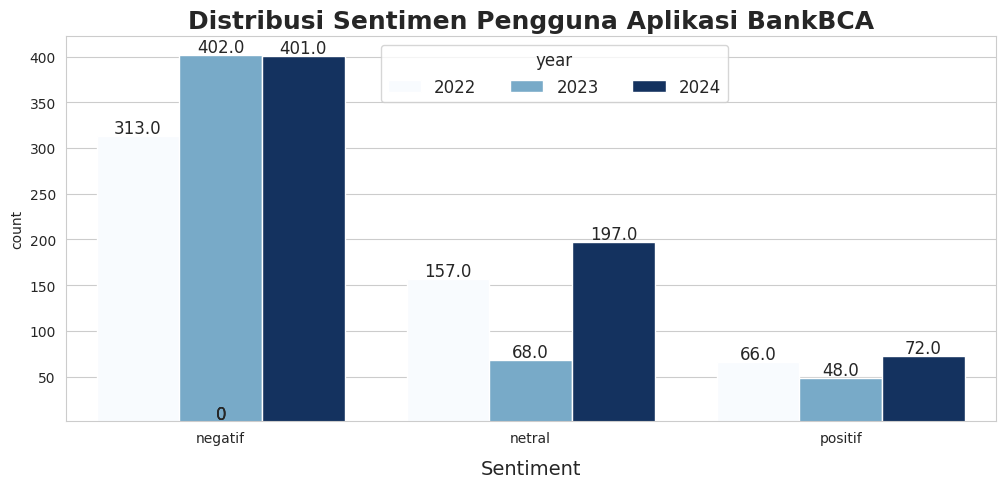

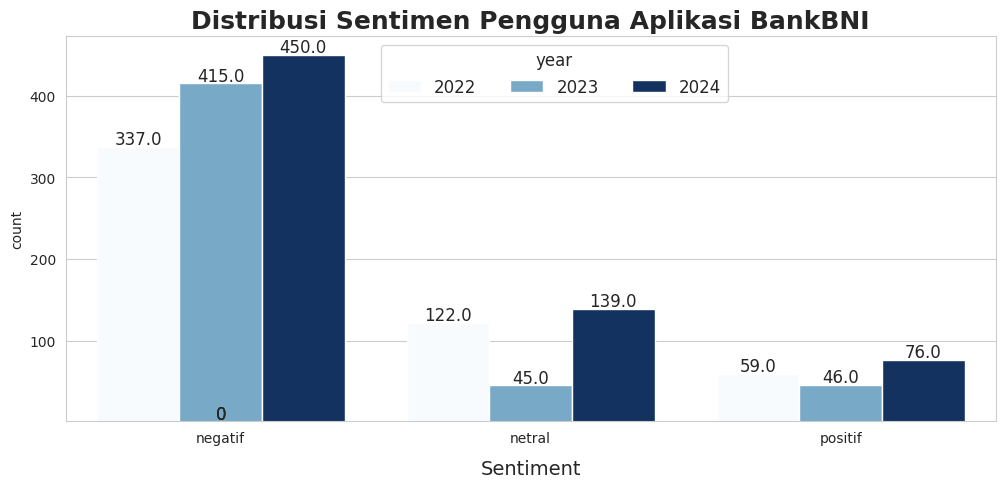

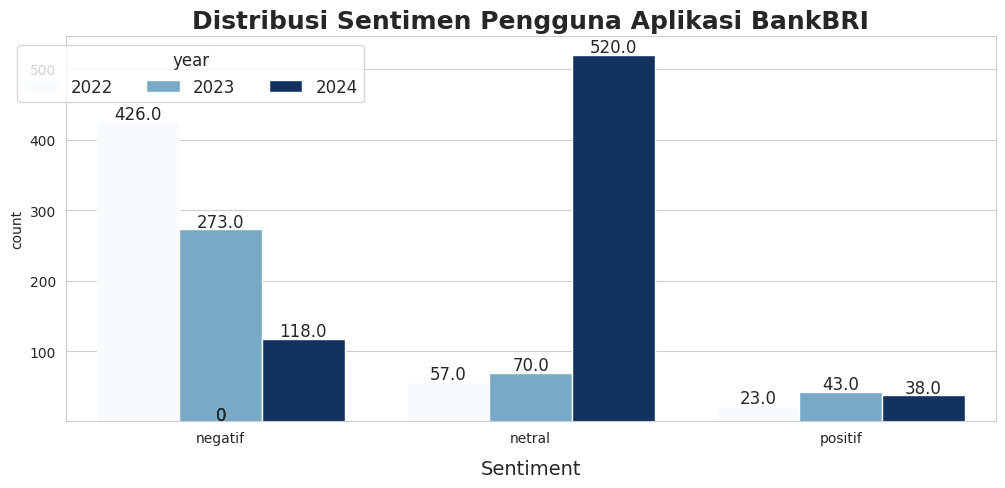

In [113]:
df['at']= pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
application= ['BCA','BNI', 'BRI']

for app in application:
  df_app = df[df['application']==app]
  position = range(len(df_app['Sentiment'].unique()))
  label = sorted(df_app['Sentiment'].unique())

  ax = sns.set_style('whitegrid')
  plt.figure(figsize = (12,5))
  ax = sns.countplot(x = 'Sentiment', hue = "year" , data = df_app, palette = 'Blues')

  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2,
            rect.get_height()+ 3.25, rect.get_height(),
            horizontalalignment='center', fontsize= 12)



  plt.legend( fontsize = 12,bbox_to_anchor = (0.33, 1), ncol = 3, title ="year", title_fontsize =12)
  plt.title(f'Distribusi Sentimen Pengguna Aplikasi Bank{app}', fontsize= 18, fontweight = 'bold')
  plt.xlabel('Sentiment', fontsize = 14, labelpad= 10)
  plt.xticks(position, label)
  plt.ylim(1)
  plt.show()

In [98]:
!pip install collections-extended
from collections import Counter

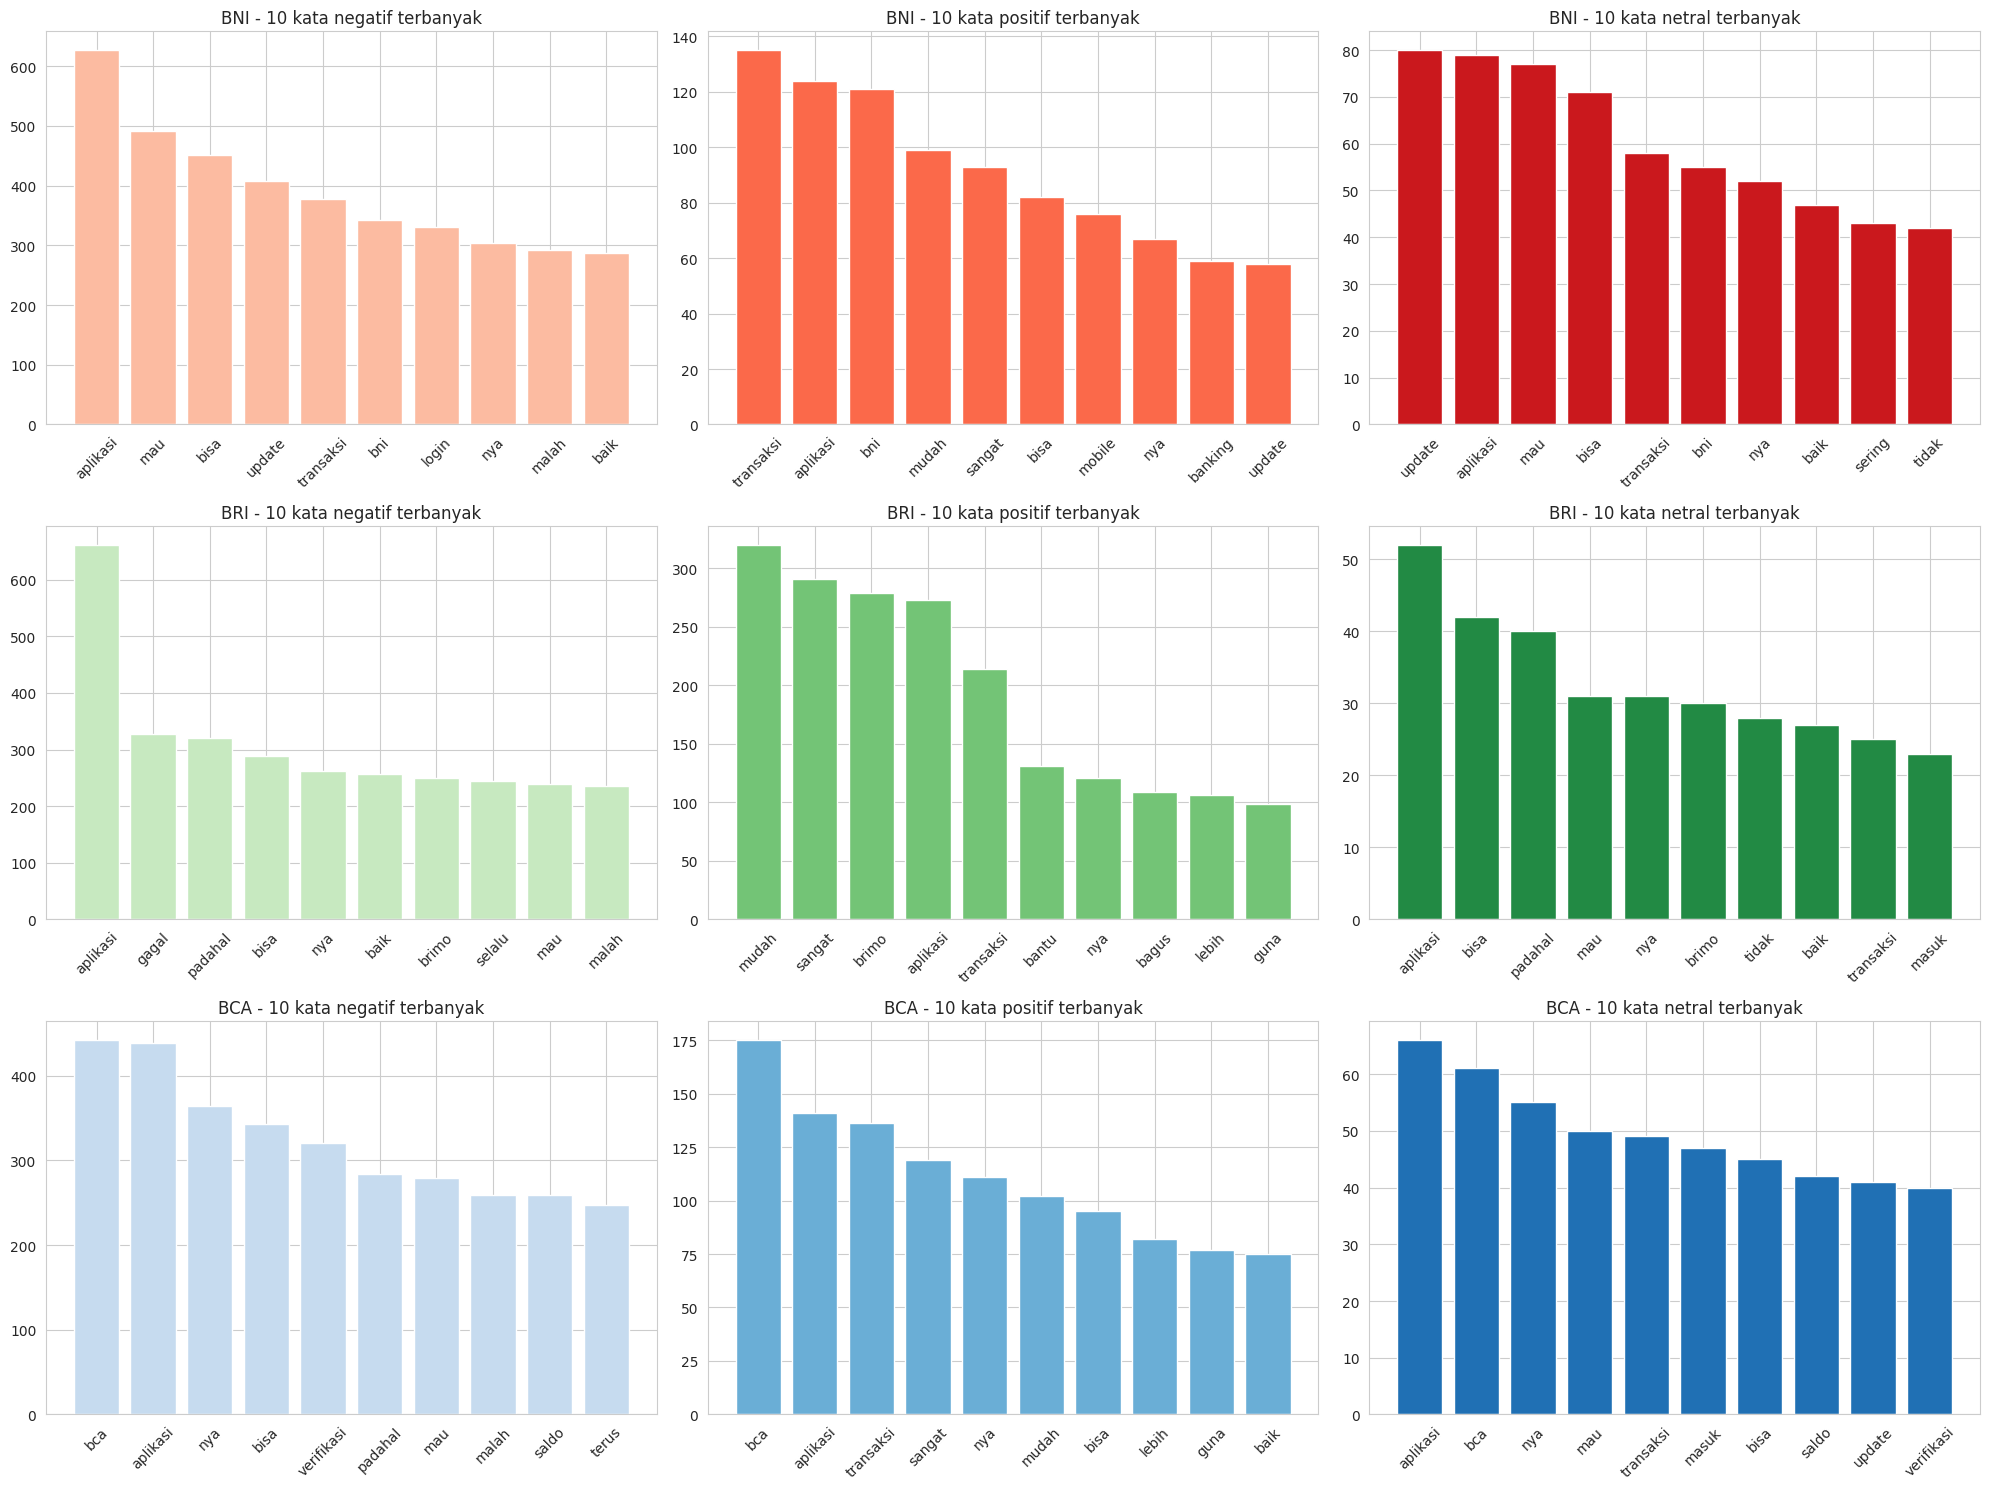

In [114]:
def hitung_kata_terbanyak(df, aplikasi, sentimen):
    komentar = df[(df['application'] == aplikasi) & (df['Sentiment'] == sentimen)]['content']
    kata_counter = Counter()
    komentar.apply(lambda x: kata_counter.update(x.split()))
    return pd.DataFrame(kata_counter.most_common(10), columns=['Kata', 'Frekuensi'])

def visualisasi_kata(top_kata_df, judul, warna, posisi):
    plt.subplot(3, 3, posisi)
    plt.bar(top_kata_df['Kata'], top_kata_df['Frekuensi'], color=warna)
    plt.title(judul)
    plt.xticks(rotation=45)

aplikasi_list = ['BNI', 'BRI', 'BCA']
sentimen_list = ['negatif', 'positif', 'netral']

palette = {
    'BNI': sns.color_palette("Reds", 3),
    'BRI': sns.color_palette("Greens", 3),
    'BCA': sns.color_palette("Blues", 3)
}

plt.figure(figsize=(20, 15))

posisi = 1
for aplikasi in aplikasi_list:
    for idx, sentimen in enumerate(sentimen_list):
        top_kata_df = hitung_kata_terbanyak(df, aplikasi, sentimen)
        warna = palette[aplikasi][idx]
        judul = f'{aplikasi} - 10 kata {sentimen} terbanyak'
        visualisasi_kata(top_kata_df, judul, warna, posisi)
        posisi += 1

plt.tight_layout()
plt.show()

In [115]:
df_BCA = df[df['application']=='BCA']
df_BNI = df[df['application']=='BNI']
df_BRI = df[df['application']=='BRI']


In [116]:

X_BCA = df_BCA['content']
y_BCA = df_BCA['Sentiment']

X_BNI = df_BNI['content']
y_BNI = df_BNI['Sentiment']

X_BRI = df_BRI['content']
y_BRI = df_BRI['Sentiment']

data = {
    'BCA': (X_BCA, y_BCA),
    'BNI': (X_BNI, y_BNI),
    'BRI': (X_BRI, y_BRI)
}


In [117]:
from sklearn.metrics import f1_score
# Split the data into training and testing

X_BCA = df_BCA['content']
y_BCA = df_BCA['Sentiment']

X_BNI = df_BNI['content']
y_BNI = df_BNI['Sentiment']

X_BRI = df_BRI['content']
y_BRI = df_BRI['Sentiment']


In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}

def encode_data(df):
    X = df['content']
    y = df['Sentiment'].map(label_mapping)
    return X, y

# Split the data into training and testing
data = {
    'BCA': encode_data(df_BCA),
    'BNI': encode_data(df_BNI),
    'BRI': encode_data(df_BRI)
}

results = []

for app, (X, y) in data.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    classifiers = {
        'NaiveBayes': MultinomialNB(),
        'SVM': SVC(kernel='linear'),
        'RF': RandomForestClassifier(),
        'XGB': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

        results.append({
            'Application': app,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Recall': report['weighted avg']['recall'],
            'Precision': report['weighted avg']['precision'],
            'F1': f1
        })

result_df = pd.DataFrame(results)
print(result_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:04:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:04:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:04:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


   Application  Classifier  Accuracy    Recall  Precision        F1
0          BCA  NaiveBayes  0.744928  0.744928   0.664865  0.698249
1          BCA         SVM  0.660870  0.660870   0.657235  0.658790
2          BCA          RF  0.762319  0.762319   0.780810  0.708847
3          BCA         XGB  0.747826  0.747826   0.703017  0.715871
4          BNI  NaiveBayes  0.727811  0.727811   0.649847  0.653371
5          BNI         SVM  0.618343  0.618343   0.585165  0.600898
6          BNI          RF  0.739645  0.739645   0.787664  0.668673
7          BNI         XGB  0.713018  0.713018   0.628174  0.654692
8          BRI  NaiveBayes  0.815287  0.815287   0.842994  0.793207
9          BRI         SVM  0.767516  0.767516   0.777228  0.771460
10         BRI          RF  0.821656  0.821656   0.849552  0.799574
11         BRI         XGB  0.805732  0.805732   0.804949  0.790572


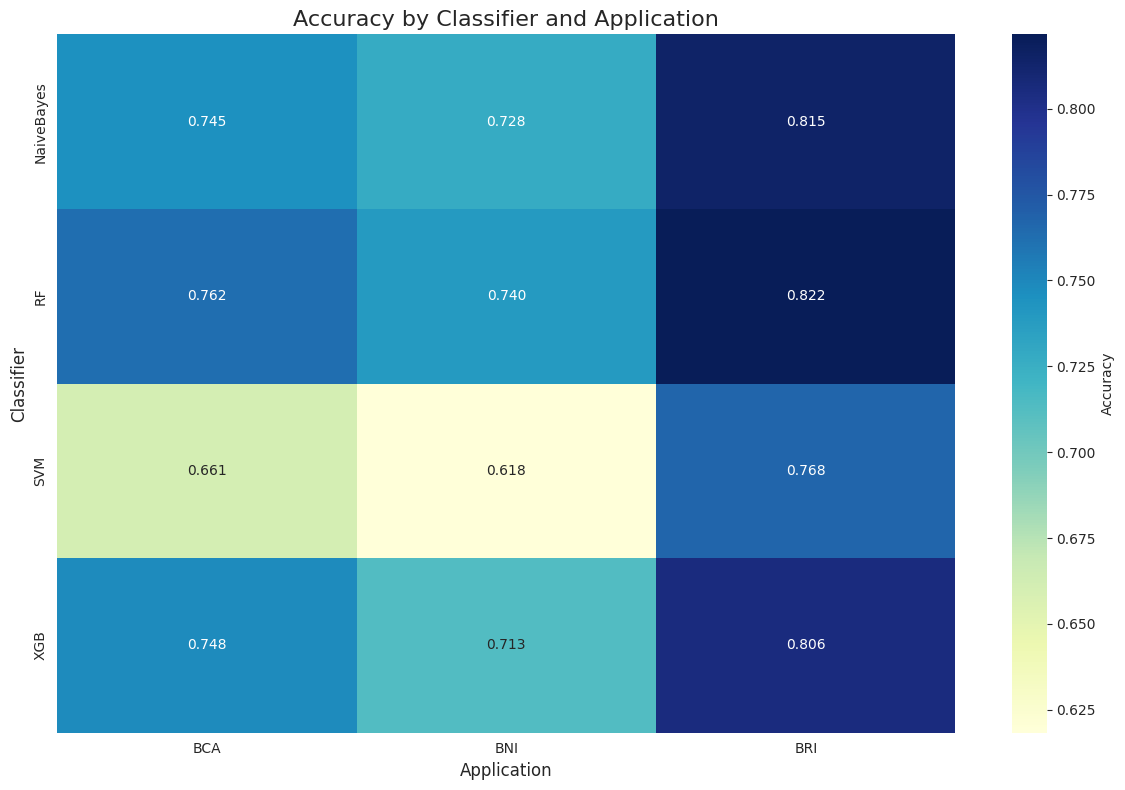

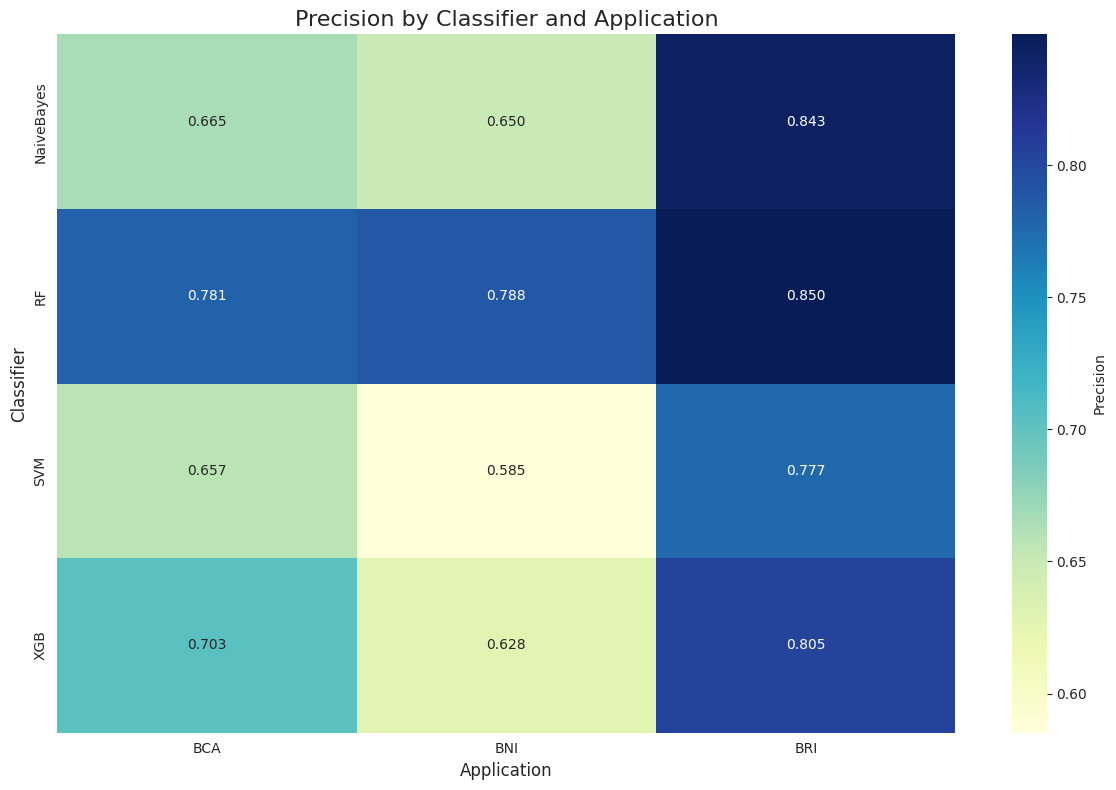

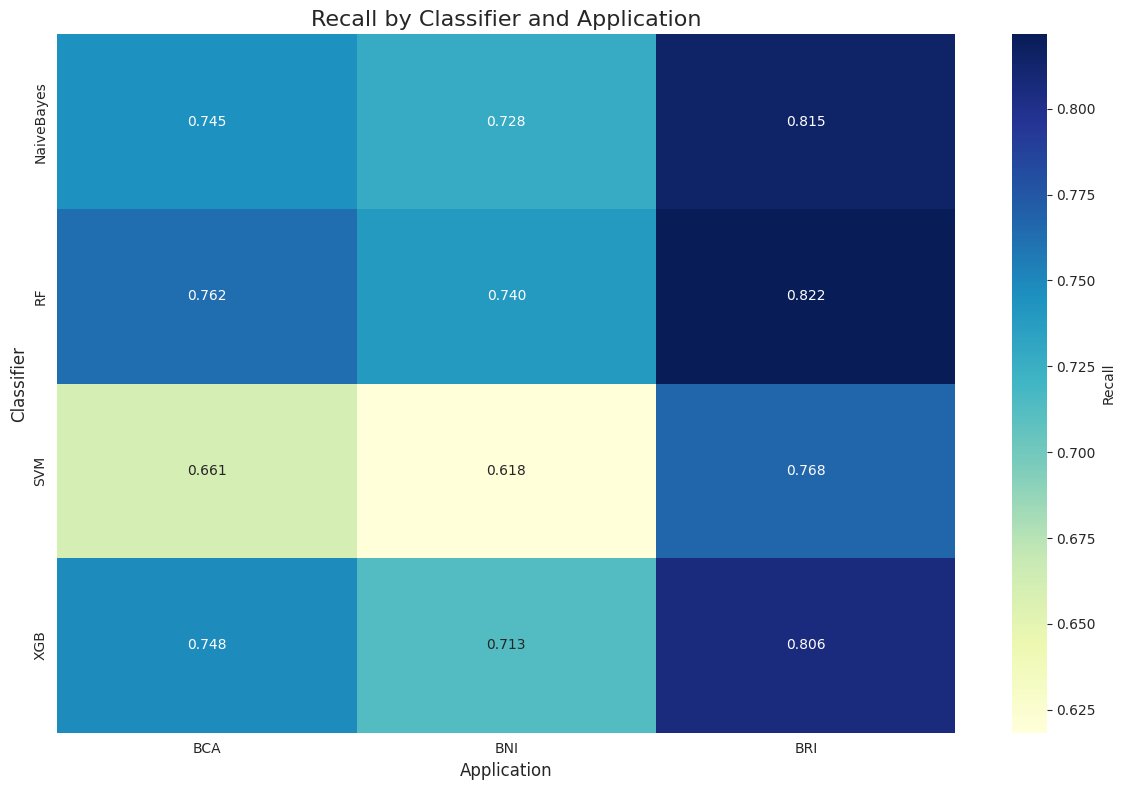

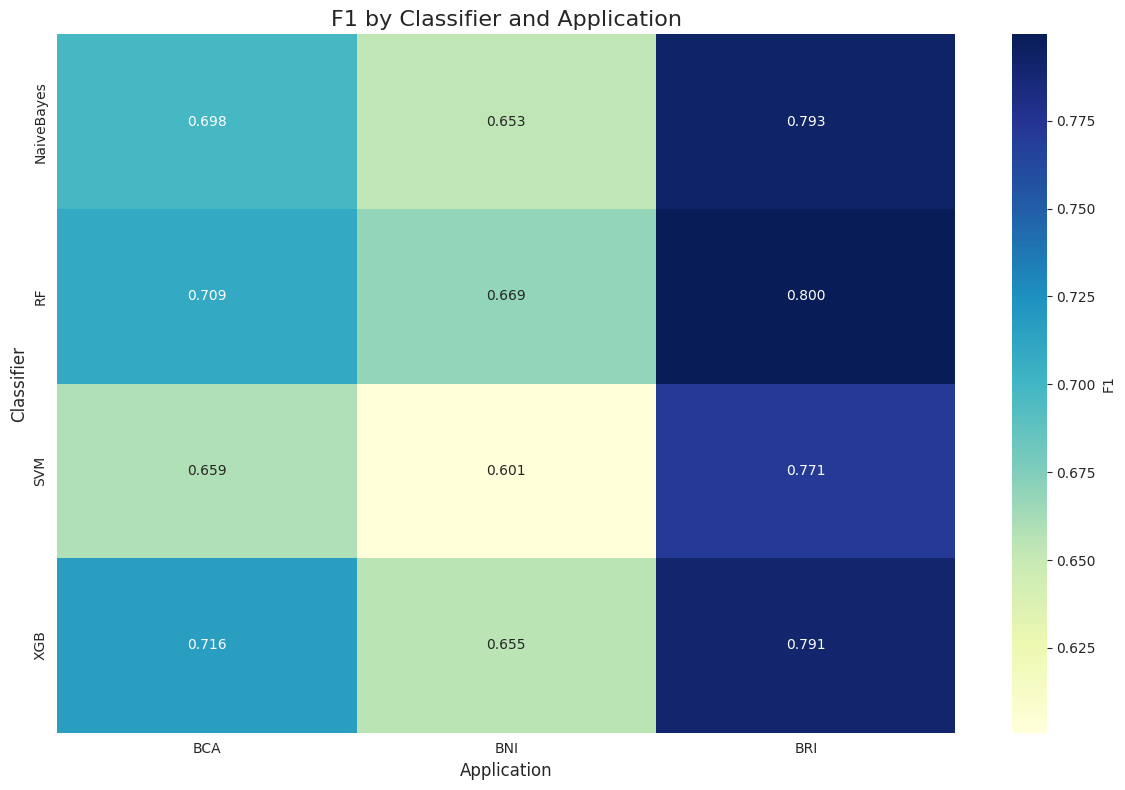

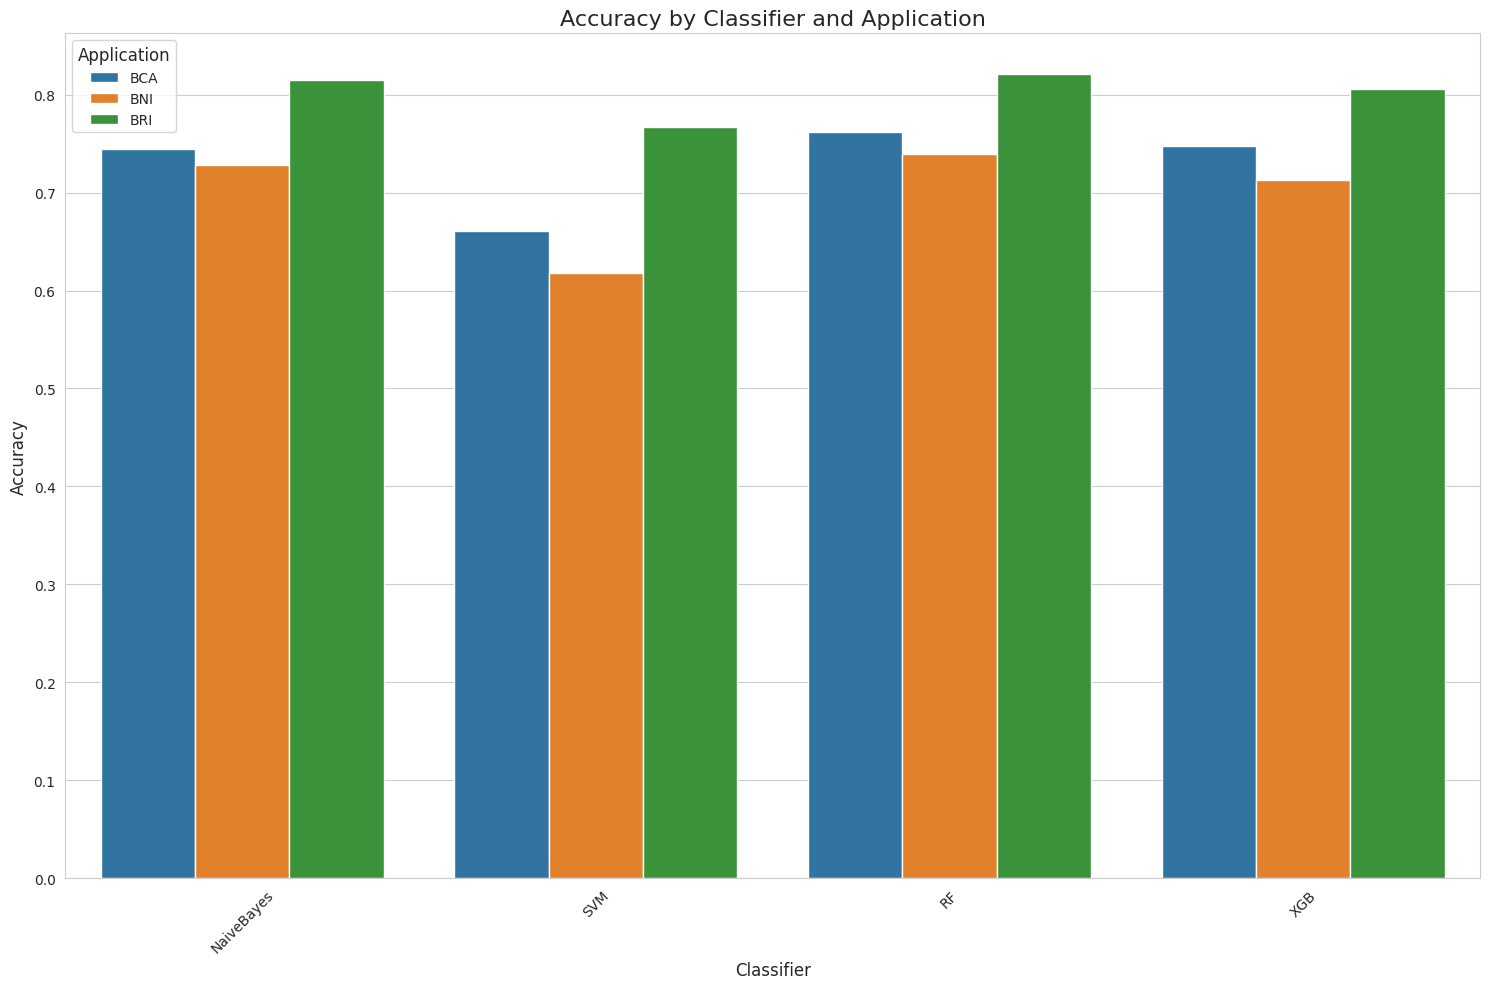


Best Performing Classifiers:
   Application Classifier  Accuracy
2          BCA         RF  0.762319
6          BNI         RF  0.739645
10         BRI         RF  0.821656


In [122]:
def create_heatmap(df, metric):
    pivot_df = df.pivot(index='Classifier', columns='Application', values=metric)
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='.3f', cbar_kws={'label': metric})
    plt.title(f'{metric} by Classifier and Application', fontsize=16)
    plt.ylabel('Classifier', fontsize=12)
    plt.xlabel('Application', fontsize=12)
    plt.tight_layout()
    plt.show()

def create_bar_plot(df):
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Classifier', y='Accuracy', hue='Application', data=df)
    plt.title('Accuracy by Classifier and Application', fontsize=16)
    plt.xlabel('Classifier', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(title='Application', title_fontsize='12', fontsize='10')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def visualize_results(result_df):
    # Overall performance heatmap
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    for metric in metrics:
        create_heatmap(result_df, metric)

    # Accuracy bar plot
    create_bar_plot(result_df)

    # Best performer for each application
    best_performers = result_df.loc[result_df.groupby('Application')['Accuracy'].idxmax()]
    print("\nBest Performing Classifiers:")
    print(best_performers[['Application', 'Classifier', 'Accuracy']])

# Call the visualization function
visualize_results(result_df)